# DATA UNDERSTANDING

## **Context**

Sebuah toko penyewaan DVD film ingin mengetahui gambaran umum tentang kondisi perilaku pelanggannya. Terdapat sebuah database yang menunjukan detail dari proses transaksi penyewaan DVD film oleh para pelanggan. Dari database tersebut, perusahaan ingin bisa mendapatkan insight yang dapat dijalankan, sehingga nantinya mereka dapat melakukan penerapan strategi yang tepat sasaran untuk memperoleh keuntungan yang lebih dari saat ini. Analisa untuk data ini akan berfokus pada customer/pelanggan, dimana dari data hasil sewa yang dilakukan oleh para pelanggan, faktor apa sajakah yang mempengaruhinya. Apakah faktor durasi sewa tiap pelanggan dan jumlah film yang disewa oleh pelanggan akan mempengaruhi hasil sewa dari para pelanggan?

## **Database Information**

Database yang digunakan adalah database ``sakila``, dengan fokus analisanya yaitu ``customer``.

Sumber Database: https://dev.mysql.com/doc/sakila/en/sakila-installation.html

Database yang dimiliki mempunyai beberapa tabel, antara lain:
- Customer      : Menyimpan informasi tentang data pelanggan/customer.
- Address       : Menyimpan informasi tentang alamat pelanggan/customer.
- City          : Menyimpan informasi tentang kota pelanggan/customer.
- Country       : Menyimpan informasi tentang negara pelanggan/customer.
- Payment       : Menyimpan informasi tentang pembayaran yang dilakukan oleh pelanggan/customer.
- Rental        : Menyimpan informasi tentang penyewaan DVD film yang dilakukan oleh pelanggan/customer.
- Inventory     : Menyimpan informasi tentang data inventaris yang berisi setiap salinan film tertentu di toko tertentu.
- Film          : Menyimpan informasi tentang daftar semua film yang berpotensi tersedia di toko-toko. Salinan stok aktual dari setiap film disajikan dalam tabel inventaris.

Setiap tabel yang tertera pada database dapat terhubung, baik secara langsung maupun tidak langsung, sehingga setiap informasi dari database ini akan dapat saling berkaitan.

# DATA BASE

## **Connecting To Database**

Bagian ini merupakan langkah awal untuk mulai melakukan proses analisis data. Pertama adalah membuat koneksi ke database di mana seperti yang sudah dijelaskan sebelumnya, database yang akan digunakan adalah database ``sakila``. Dengan melakukan koneksi ini, kita dapat mengakses seluruh tabel yang ada pada database.

In [48]:
# Import Modules

import mysql.connector
import pandas as pd
import numpy as np

In [49]:
# Connect To Database

mydb = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    password = 'root',
    database = 'sakila'
)

Selain melakukan koneksi ke database, hal lain yang perlu dilakukan pada bagian awal ini adalah membuat sebuah fungsi untuk menuliskan query yang kemudian akan disimpan dalam bentuk DataFrame. Tujuannya adalah agar data hasil query yang dibuat dapat disimpan dan digunakan untuk keperluan analisis data. Nantinya, di sini terdapat 2 query untuk mengambil data-data yang ada di database, bukan hanya berasal dari 1 tabel, tapi juga akan melibatkan hubungan antar tabel.

In [50]:
# Querry Function

mycursor = mydb.cursor()

def sql_df(yourQuerry):
    mycursor.execute(yourQuerry)
    myresult = mycursor.fetchall()
    df = pd.DataFrame(myresult, columns = mycursor.column_names)
    return df

## **Data Transaksi Penyewaan DVD Film**

Data ini merupakan gabungan dari tabel, yaitu tabel ```customer```, ```address```, ```city```, ```country```, ```payment```, ```rental```, dan ```film```. Masing-masing dari setiap tabel tersebut diambil beberapa kolomnya dan tidak diambil secara keseluruhan. Informasi-informasi yang dianggap penting saja lah yang diambil. Informasi yang diambil antara lain adalah :
- customer_id dari tabel customer
- first_name dari tabel customer
- last_name dari tabel customer
- email dari tabel customer
- address dari tabel address
- phone dari tabel address
- city dari tabel city
- country dari tabel country
- amount dari tabel payment
- payment_date dari tabel payment
- rental_date dari tabel rental
- return_date dari tabel rental

Semua informasi tersebut kemudian dijadikan dalam sebuah DataFrame yang nantinya akan diolah informasinya.

In [51]:
# Querry 1

table1 = sql_df('''
select c.customer_id, c.first_name, c.last_name, concat(c.first_name,' ',c.last_name) as name, c.email,
    a.address, a.phone,
    ci.city,
    co.country,
    sum(p.amount) as payment_total, p.payment_date,
    r.rental_date, r.return_date,
    count(f.title) as total_film
from customer c
join address a on c.address_id = a.address_id
join city ci on a.city_id = ci.city_id
join country co on ci.country_id = co.country_id
join payment p on c.customer_id = p.customer_id
join rental r on c.customer_id = r.customer_id
join inventory i on r.inventory_id = i.inventory_id
join film f on i.film_id = f.film_id
join film_category fc on f.film_id = fc.film_id
join category cf on fc.category_id = cf.category_id
group by customer_id;
''')

table1

,customer_id,first_name,last_name,name,email,address,phone,city,country,payment_total,payment_date,rental_date,return_date,total_film
0,1,MARY,SMITH,MARY SMITH,MARY.SMITH@sakilacustomer.org,1913 Hanoi Way,28303384290,Sasebo,Japan,3797.76,2005-05-25 11:30:37,2005-05-25 11:30:37,2005-06-03 12:00:37,1024
1,2,PATRICIA,JOHNSON,PATRICIA JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,1121 Loja Avenue,838635286649,San Bernardino,United States,3475.71,2005-05-27 00:09:24,2005-05-27 00:09:24,2005-05-28 04:30:24,729
2,3,LINDA,WILLIAMS,LINDA WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,692 Joliet Street,448477190408,Athenai,Greece,3529.24,2005-05-27 17:17:09,2005-05-27 17:17:09,2005-06-02 11:20:09,676
3,4,BARBARA,JONES,BARBARA JONES,BARBARA.JONES@sakilacustomer.org,1566 Inegl Manor,705814003527,Myingyan,Myanmar,1799.16,2005-06-15 09:31:28,2005-06-15 09:31:28,2005-06-19 04:33:28,484
4,5,ELIZABETH,BROWN,ELIZABETH BROWN,ELIZABETH.BROWN@sakilacustomer.org,53 Idfu Parkway,10655648674,Nantou,Taiwan,5495.56,2005-05-29 07:25:16,2005-05-29 07:25:16,2005-05-30 05:21:16,1444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,595,TERRENCE,GUNDERSON,TERRENCE GUNDERSON,TERRENCE.GUNDERSON@sakilacustomer.org,844 Bucuresti Place,935952366111,Jinzhou,China,3531.00,2005-05-28 15:27:22,2005-05-28 15:27:22,2005-06-02 20:01:22,900
595,596,ENRIQUE,FORSYTHE,ENRIQUE FORSYTHE,ENRIQUE.FORSYTHE@sakilacustomer.org,1101 Bucuresti Boulevard,199514580428,Patras,Greece,2708.16,2005-05-26 21:16:52,2005-05-26 21:16:52,2005-05-27 23:41:52,784
596,597,FREDDIE,DUGGAN,FREDDIE DUGGAN,FREDDIE.DUGGAN@sakilacustomer.org,1103 Quilmes Boulevard,644021380889,Sullana,Peru,2493.75,2005-05-25 04:19:28,2005-05-25 04:19:28,2005-05-29 00:10:28,625
597,598,WADE,DELVALLE,WADE DELVALLE,WADE.DELVALLE@sakilacustomer.org,1331 Usak Boulevard,145308717464,Lausanne,Switzerland,1843.16,2005-06-20 10:10:29,2005-06-20 10:10:29,2005-06-28 15:48:29,484


## **Data Harga Pembayaran Dan Jumlah DVD Film Yang Disewa Oleh Pelanggan**

Data ini merupakan informasi yang bisa menjadi data tambahan untuk melihat gambaran tentang data yang dimiliki. Data ini memuat nama pelanggan, jumlah film yang disewa, dan total pembayarannya untuk masing-masing pelanggan.

In [52]:
# Querry 2

table2 = sql_df('''
select concat(c.first_name,' ',c.last_name) as Nama, count(f.title) as Jumlah_Film_Yang_Disewa,
sum(p.amount) as Total_Pembayaran
from customer c
join payment p on c.customer_id = p.customer_id
join rental r on c.customer_id = r.customer_id
join inventory i on r.inventory_id = i.inventory_id
join film f on i.film_id = f.film_id
group by Nama
order by Jumlah_Film_Yang_Disewa desc;
''')

table2

,Nama,Jumlah_Film_Yang_Disewa,Total_Pembayaran
0,ELEANOR HUNT,2116,9960.84
1,KARL SEAL,2025,9969.75
2,CLARA SHAW,1764,8214.36
3,MARCIA DEAN,1764,7374.36
4,TAMMY SANDERS,1681,6379.19
...,...,...,...
594,CAROLINE BOWMAN,225,762.75
595,KATHERINE RIVERA,196,824.04
596,LEONA OBRIEN,196,712.04
597,TIFFANY JORDAN,196,838.04


## **Data Pelanggan Yang Melebihi Waktu Peminjaman**

Data ini memuat informasi nama pelanggan beserta alamat dan nomor teleponnya yang melakukan peminjaman DVD film melebihi durasi yang telah ditentukan. Sehingga penyewa DVD film perlu menghubungi pelanggan tersebut agar segera mengembalikan DVD film yang telah dipinjamnya.

In [47]:
# Querry 3

table3 = sql_df('''
select concat(c.first_name,' ',c.last_name) as Nama, c.email as Email, a.address as Alamat, a.phone as Telepon
from rental r join customer c on r.customer_id = c.customer_id
join address a on c.address_id = a.address_id
join inventory i on r.inventory_id = i.inventory_id
join film f on i.film_id = f.film_id
where r.return_date is null
and rental_date + interval f.rental_duration day < current_date()
group by Nama
order by f.title
;
''')

table3

,Nama,Email,Alamat,Telepon
0,DWAYNE OLVERA,DWAYNE.OLVERA@sakilacustomer.org,1447 Imus Place,62127829280
1,BRANDON HUEY,BRANDON.HUEY@sakilacustomer.org,1912 Emeishan Drive,99883471275
2,CARMEN OWENS,CARMEN.OWENS@sakilacustomer.org,1378 Alvorada Avenue,272234298332
3,SETH HANNON,SETH.HANNON@sakilacustomer.org,1759 Niznekamsk Avenue,864392582257
4,TRACY COLE,TRACY.COLE@sakilacustomer.org,1002 Ahmadnagar Manor,371490777743
...,...,...,...,...
154,NAOMI JENNINGS,NAOMI.JENNINGS@sakilacustomer.org,1884 Shikarpur Avenue,959949395183
155,JEREMY HURTADO,JEREMY.HURTADO@sakilacustomer.org,1133 Rizhao Avenue,600264533987
156,NATALIE MEYER,NATALIE.MEYER@sakilacustomer.org,1201 Qomsheh Manor,873492228462
157,NEIL RENNER,NEIL.RENNER@sakilacustomer.org,1817 Livorno Way,478380208348


## **Data Pelanggan Yang Memiliki Rata-Rata Pembayaran Lebih Dari Rata-Rata Keseluruhan Pembayaran**

Data ini berisi data pelanggan yang memiliki nilai rata-rata transaksi pembayaran melebihi rata-rata seluruh pembayaran pelanggan. Hal ini dimaksudkan supaya penyewa film mampu mengetahui pelanggan mana saja yang mampu memberikan keuntungan lebih pada bisnisnya.

In [53]:
# Querry 4 (CTE)

sql_df('''
with payment_avg as (
select avg(amount) as avg_payment
from payment)

select concat(c.first_name,' ',c.last_name) as Nama, avg(p.amount) as Pembayaran
from customer c
join payment p on c.customer_id = p.customer_id
group by Nama
having avg(p.amount) >= (select avg_payment from payment_avg)
order by Pembayaran desc;
''')

,Nama,Pembayaran
0,BRITTANY RILEY,5.704286
1,DON BONE,5.350000
2,KEVIN SCHULER,5.308182
3,LONNIE TIRADO,5.267778
4,PAUL TROUT,5.250870
...,...,...
293,DAVE GARDINER,4.208750
294,BETTY WHITE,4.204286
295,KATHERINE RIVERA,4.204286
296,ELLEN SIMPSON,4.204286


# DATA MANIPULATION

Seperti yang telah dijelaskan sebelumnya, data yang digunakan untuk dianalisis adalah data pada ```table1```. Sebelum melakukan analisis lebih lanjut, hal yang harus dilakukan adalah mengecek informasi serta anomali pada data. Jika memang terdapat hal-hal yang dianggap 'kotor' pada data, maka yang perlu dilakukan adalah melakukan penanganan pada bagian tersebut. Pada bagian ini, data akan 'dibersihkan', sehingga output akhir yang diharapkan adalah terdapat sebuah dataset yang bersih yang dapat dianalisis lebih lanjut dengan menampilkan visualisasi, serta melihat statistics-nya.

## **Data Anomalies**

In [6]:
# Check Info Tabel1

table1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    599 non-null    int64         
 1   first_name     599 non-null    object        
 2   last_name      599 non-null    object        
 3   name           599 non-null    object        
 4   email          599 non-null    object        
 5   address        599 non-null    object        
 6   phone          599 non-null    object        
 7   city           599 non-null    object        
 8   country        599 non-null    object        
 9   payment_total  599 non-null    object        
 10  payment_date   599 non-null    datetime64[ns]
 11  rental_date    599 non-null    datetime64[ns]
 12  return_date    599 non-null    datetime64[ns]
 13  total_film     599 non-null    int64         
dtypes: datetime64[ns](3), int64(2), object(9)
memory usage: 65.6+ KB


## **Melihat Data Sekilas Dari General Info**

Dari info diatas terlihat bahwa secara keseluruhan terdapat 599 baris data dengan total 14 kolom. Setiap kolomnya memiliki tipe data yang berbeda-beda. Ada object, integer, dan datetime. Jika melihat informasi pada non-null values atau data yang tersedia pada setiap kolomnya tersebut, semua kolom atau feature memiliki data yang lengkap. Namun, pada informasi tipe data, ada satu tipe data yang salah yaitu pada kolom ```payment_total```.

In [7]:
# Check Missing Value Percentage

table1.isnull().sum()

customer_id      0
first_name       0
last_name        0
name             0
email            0
address          0
phone            0
city             0
country          0
payment_total    0
payment_date     0
rental_date      0
return_date      0
total_film       0
dtype: int64

## **Missing Values**

Dari pengecekan missing values diatas juga terlihat bahwa tidak ada data yang berbeda. Sehingga kita tidak perlu melakukan penanganan untuk jumlah data yang berbeda.

## **Mengubah Tipe Data Yang Salah**

Pada general info sebelumnya telah diketahui bahwa ada tipe data yang tidak sesuai. Kolom features tersebut terlebih dahulu diubah agar fungsionalitasnya kembali ke hakekatnya. Tujuannya tentu saja agar features tersebut dapat dipergunakan sebagaimana mestinya.

In [8]:
# Change Spesific Column To Numeric Format

table1['payment_total'] = pd.to_numeric(table1['payment_total'])

In [9]:
# Recheck Info

table1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    599 non-null    int64         
 1   first_name     599 non-null    object        
 2   last_name      599 non-null    object        
 3   name           599 non-null    object        
 4   email          599 non-null    object        
 5   address        599 non-null    object        
 6   phone          599 non-null    object        
 7   city           599 non-null    object        
 8   country        599 non-null    object        
 9   payment_total  599 non-null    float64       
 10  payment_date   599 non-null    datetime64[ns]
 11  rental_date    599 non-null    datetime64[ns]
 12  return_date    599 non-null    datetime64[ns]
 13  total_film     599 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(8)
memory usage: 65.6+ 

## **Recheck Data Information**

Bagian sebelumnya, features yang memiliki tipe data yang salah sudah diubah ke dalam tipe data yang seharusnya. Untuk memastikannya, output di atas merupakan informasi umum yang kembali diperlihatkan untuk memastikan tipe data yang sudah diubah tersebut. Features yang seharusnya bertipe data numerik, yaitu payment_total sudah menjadi tipe data float64. Dengan begini, perubahan yang dilakukan sebelumnya sudah terimplementasi dan anomali data sudah teratasi.

In [10]:
# Check Duplicate

table1[table1.duplicated()]

,customer_id,first_name,last_name,name,email,address,phone,city,country,payment_total,payment_date,rental_date,return_date,total_film


## **Data Duplicate**

Anomali berikutnya yang bisa ditemui adalah data yang duplikat. Tentu saja data yang bersifat duplikat ini akan menjadi sesuatu hal yang akan mengganggu proses analisis data. Jika memang nantinya terdapat data yang duplikat, sebaiknya data duplikatnya dihapus dan disisakan data yang unique saja. Untuk data saat ini, melihat output di atas artinya tidak terdapat data yang duplikat. Dengan begitu tidak perlu ada action yang dilakukan.

## **Features 'rental_time'**

Data awal menunjukan terdapat beberapa features yang merupakan tipe data datetime. Artinya, kita dapat melakukan ekstraksi informasi tambahan dari kedua features tersebut. Sebelumnya, kita perlu tahu dulu definisi dari kedua tabel tersebut. rental_date secara singkat dapat diartikan sebagai waktu penyewaan oleh pelanggan, sedangkat return_date adalah waktu pelanggan mengembalikan DVD film yang telah disewanya. 

Melihat kedua definisi tersebut, sebuah informasi dapat diambil yaitu seberapa lama waktu peminjaman DVD film yang dilakukan oleh para pelanggan dari waktu peminjaman hingga waktu pengembalian. Oleh karena itu, untuk mendapatkan informasinya, maka perlu dilakukan pengurangan antara return_date dengan rental_date. Mungkin akan timbul pertanyaan, apakah waktu dapat dikurangkan? Jawabannya, bisa. Output yang keluar nantinya akan berupa selisih atau lamanya waktu proses tersebut dalam satuan hari.

In [55]:
# Add New Column (Rental Time)

from datetime import datetime

table1['rental_time'] = (table1['return_date'] - table1['rental_date']).dt.days 
table1

,customer_id,first_name,last_name,name,email,address,phone,city,country,payment_total,payment_date,rental_date,return_date,total_film,rental_time
0,1,MARY,SMITH,MARY SMITH,MARY.SMITH@sakilacustomer.org,1913 Hanoi Way,28303384290,Sasebo,Japan,3797.76,2005-05-25 11:30:37,2005-05-25 11:30:37,2005-06-03 12:00:37,1024,9
1,2,PATRICIA,JOHNSON,PATRICIA JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,1121 Loja Avenue,838635286649,San Bernardino,United States,3475.71,2005-05-27 00:09:24,2005-05-27 00:09:24,2005-05-28 04:30:24,729,1
2,3,LINDA,WILLIAMS,LINDA WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,692 Joliet Street,448477190408,Athenai,Greece,3529.24,2005-05-27 17:17:09,2005-05-27 17:17:09,2005-06-02 11:20:09,676,5
3,4,BARBARA,JONES,BARBARA JONES,BARBARA.JONES@sakilacustomer.org,1566 Inegl Manor,705814003527,Myingyan,Myanmar,1799.16,2005-06-15 09:31:28,2005-06-15 09:31:28,2005-06-19 04:33:28,484,3
4,5,ELIZABETH,BROWN,ELIZABETH BROWN,ELIZABETH.BROWN@sakilacustomer.org,53 Idfu Parkway,10655648674,Nantou,Taiwan,5495.56,2005-05-29 07:25:16,2005-05-29 07:25:16,2005-05-30 05:21:16,1444,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,595,TERRENCE,GUNDERSON,TERRENCE GUNDERSON,TERRENCE.GUNDERSON@sakilacustomer.org,844 Bucuresti Place,935952366111,Jinzhou,China,3531.00,2005-05-28 15:27:22,2005-05-28 15:27:22,2005-06-02 20:01:22,900,5
595,596,ENRIQUE,FORSYTHE,ENRIQUE FORSYTHE,ENRIQUE.FORSYTHE@sakilacustomer.org,1101 Bucuresti Boulevard,199514580428,Patras,Greece,2708.16,2005-05-26 21:16:52,2005-05-26 21:16:52,2005-05-27 23:41:52,784,1
596,597,FREDDIE,DUGGAN,FREDDIE DUGGAN,FREDDIE.DUGGAN@sakilacustomer.org,1103 Quilmes Boulevard,644021380889,Sullana,Peru,2493.75,2005-05-25 04:19:28,2005-05-25 04:19:28,2005-05-29 00:10:28,625,3
597,598,WADE,DELVALLE,WADE DELVALLE,WADE.DELVALLE@sakilacustomer.org,1331 Usak Boulevard,145308717464,Lausanne,Switzerland,1843.16,2005-06-20 10:10:29,2005-06-20 10:10:29,2005-06-28 15:48:29,484,8


## **Unique Value 'rental_time'**

Setelah membuat sebuah kolom baru yang bernama rental_time sebagaimana yang sudah didefinisikan sebelumnya, mari kita cek bagaimana data tersebut. Jika melihat dari preview output sebelumnya, tidak ada keanehan. Lantas bagaimana jika kita melihat lebih dalam ke dalam feature baru ini? Berikut ini penampakan hasil yang memperlihatkan unique values beserta jumlah data di setiap unique values-nya.

Dan terlihat dari hasil berikut tidak ada anomali data pada kolom rental_time. Oleh karena itu, data ini bisa dipertahankan dan bisa dilakukan analisia selanjutnya.

In [56]:
# Check Data Anomalies in Date Time Format

table1['rental_time'].value_counts()

1    81
8    71
3    70
4    69
7    64
5    63
2    62
6    53
9    33
0    33
Name: rental_time, dtype: int64

## **Preview Cleaned Data**

Setelah semua anomalies sudah diselesaikan, artinya data yang dimiliki sudah bersih. Di bawah ini adalah sample data yang dianggap sudah bersih setelah melewati proses-proses sebelumnya.

In [13]:
# Clean Data

table1.sample(20)

,customer_id,first_name,last_name,name,email,address,phone,city,country,payment_total,payment_date,rental_date,return_date,total_film,rental_time
588,589,TRACY,HERRMANN,TRACY HERRMANN,TRACY.HERRMANN@sakilacustomer.org,1074 Sanaa Parkway,154124128457,Loja,Ecuador,3632.16,2005-05-28 05:23:38,2005-05-28 05:23:38,2005-05-29 08:00:38,784,1
33,34,REBECCA,SCOTT,REBECCA SCOTT,REBECCA.SCOTT@sakilacustomer.org,61 Tama Street,708403338270,Kurashiki,Japan,2154.24,2005-06-17 04:29:58,2005-06-17 04:29:58,2005-06-21 05:58:58,576,4
561,562,WALLACE,SLONE,WALLACE SLONE,WALLACE.SLONE@sakilacustomer.org,1342 Sharja Way,946114054231,Sokoto,Nigeria,2743.75,2005-05-29 16:13:55,2005-05-29 16:13:55,2005-05-31 16:40:55,625,2
548,549,NELSON,CHRISTENSON,NELSON CHRISTENSON,NELSON.CHRISTENSON@sakilacustomer.org,1764 Jalib al-Shuyukh Parkway,84794532510,Santiago de Compostela,Spain,1556.00,2005-05-24 23:08:07,2005-05-24 23:08:07,2005-05-27 01:32:07,400,2
412,413,MARVIN,YEE,MARVIN YEE,MARVIN.YEE@sakilacustomer.org,126 Acua Parkway,480039662421,Berhampore (Baharampur),India,1591.59,2005-05-25 05:09:04,2005-05-25 05:09:04,2005-05-27 23:12:04,441,2
399,400,BRYAN,HARDISON,BRYAN HARDISON,BRYAN.HARDISON@sakilacustomer.org,530 Lausanne Lane,775235029633,Dallas,United States,3492.16,2005-05-25 16:12:52,2005-05-25 16:12:52,2005-06-02 18:55:52,784,8
182,183,IDA,ANDREWS,IDA ANDREWS,IDA.ANDREWS@sakilacustomer.org,1839 Szkesfehrvr Parkway,947468818183,Luzinia,Brazil,1765.71,2005-05-27 10:12:00,2005-05-27 10:12:00,2005-05-31 15:03:00,529,4
584,585,PERRY,SWAFFORD,PERRY SWAFFORD,PERRY.SWAFFORD@sakilacustomer.org,773 Dallas Manor,914466027044,Quilmes,Argentina,2826.24,2005-06-15 12:29:41,2005-06-15 12:29:41,2005-06-22 12:45:41,576,7
591,592,TERRANCE,ROUSH,TERRANCE ROUSH,TERRANCE.ROUSH@sakilacustomer.org,42 Fontana Avenue,437829801725,Szkesfehrvr,Hungary,3239.59,2005-06-14 23:12:46,2005-06-14 23:12:46,2005-06-23 21:53:46,841,8
181,182,RENEE,LANE,RENEE LANE,RENEE.LANE@sakilacustomer.org,533 al-Ayn Boulevard,662227486184,Compton,United States,2541.24,2005-05-26 01:51:48,2005-05-26 01:51:48,2005-05-27 05:42:48,676,1


## **General Info Cleaned Data**

Berikut ini merupakan informasi umum dari data yang telah dibersihkan dari anomali-anomali sebelumnya.

In [57]:
# Check Some Info

listItem = []
for col in table1.columns :
    listItem.append([col, table1[col].dtype, len(table1),table1[col].isna().sum(),
                    round((table1[col].isna().sum()/len(table1[col])) * 100,2),
                    table1[col].nunique(), list(table1[col].drop_duplicates().sample(2).values)])

table1Desc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
table1Desc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,customer_id,int64,599,0,0.0,599,"[575, 501]"
1,first_name,object,599,0,0.0,591,"[CARLOS, FELICIA]"
2,last_name,object,599,0,0.0,599,"[SIMPSON, EAST]"
3,name,object,599,0,0.0,599,"[DANNY ISOM, PATRICIA JOHNSON]"
4,email,object,599,0,0.0,599,"[ANNETTE.OLSON@sakilacustomer.org, BILLIE.HORT..."
5,address,object,599,0,0.0,599,"[984 Novoterkassk Loop, 1405 Hagonoy Avenue]"
6,phone,object,599,0,0.0,599,"[615964523510, 331132568928]"
7,city,object,599,0,0.0,597,"[Kansas City, Sungai Petani]"
8,country,object,599,0,0.0,108,"[Ukraine, Kenya]"
9,payment_total,object,599,0,0.0,434,"[3531.00, 3732.75]"


## **Payment Total Berdasarkan Rental Time**

In [15]:
# Groupping and Aggregating

table1[['payment_total','rental_time']].groupby('rental_time').describe()

payment_total                                                \
                    count         mean          std      min        25%   
rental_time                                                               
0                    33.0  3080.186364  1651.733317  1261.44  2156.7100   
1                    81.0  2949.760617  1348.888090   712.04  2064.7100   
2                    62.0  3033.857419  1342.298853   942.75  2007.9300   
3                    70.0  3413.853286  1510.305445  1098.39  2431.0475   
4                    69.0  3098.185652  1130.228960  1053.44  2202.7100   
5                    63.0  3103.240476  1156.087981  1508.76  2352.7300   
6                    53.0  3236.556981  1230.794578   838.04  2418.7500   
7                    64.0  3150.188281  1155.979309  1181.44  2311.9600   
8                    71.0  3070.715915  1188.749382   634.56  2389.2000   
9                    33.0  3185.580606   973.840208  1238.76  2593.7500   

                                          
                 50%        75%      max  
rental_time                               
0            2658.24  3741.0000  9960.84  
1            2643.75  3829.7600  9969.75  
2            2856.25  3569.9675  7374.36  
3            3058.16  4138.2900  8214.36  
4            2962.71  3772.3900  6184.00  
5            2723.24  3802.5800  7589.79  
6            3018.24  3703.5900  7104.00  
7            2865.20  4060.1325  5747.04  
8            2983.24  3879.1950  6179.56  
9            3100.16  3674.5900  5517.75

Berdasarkan agregasi dan pengelompokan data antara features payment_total dengan rental_time diatas, kita dapat mengetehaui beberapa informasi.
Terdapat sebuah feature yang bernama 'rental_time' pada dataset. Feature ini merupakan durasi peminjaman DVD film yang dilakukan oleh para pelanggan dengan satuan hari yang pada database. Feature 'rental_time' ini terdiri dari beberapa kategori durasi peminjaman, mulai dari hari ke-0 hingga hari ke-9.
Dari tabel diatas dapat diambil informasi bahwa rata-rata pelanggan melakukan peminjaman DVD film selama 1 hari, dengan total 'rental_time' nya yaitu sebanyak 81. Namun, banyaknya waktu peminjaman tidak mempengaruhi jumlah pembayaran yang dilakukan oleh pelanggan. Dimana dari data tabel tersebut, untuk rata-rata total biaya peminjaman DVD film yaitu sekitar 3.413 dengan durasi peminjamannya yaitu selama 3 hari.

# **DATA VISUALIZATION & STATISTICS**

## **Statistik Deskriptif**

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from collections import Counter
sns.set(style="darkgrid")

Berikut ini merupakan deskriptif statistik data untuk data numerik yang ada pada tabel sebelumnya. Statistik deskriptif ini menggunakan fungsi ``.describe()`` dan akan menampilkan informasi statistik antara lain : ``jumlah data``, ``rata-rata``, ``standar deviasi``, ``nilai minimum``, ``kuartil 1``, ``kuartil 2``, ``kuartil 3``, dan ``nilai maksimum``.

In [21]:
table1[['payment_total', 'total_film', 'rental_time']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
payment_total,599.0,3127.244023,1275.005703,634.56,2232.7,2943.75,3800.58,9969.75
total_film,599.0,743.711185,283.285824,144.00,529.0,676.00,900.00,2116.00
rental_time,599.0,4.402337,2.678428,0.00,2.0,4.00,7.00,9.00


In [22]:
def central_tendency(column):
  data = {}
  data['Column'] = column.name
  data['Mean'] = st.mean(column)
  data['Mode'] = Counter(column).most_common()[0][0]
  data['Median'] = st.median(column)
  return pd.DataFrame([data])

def dispersion(column):
  data = {}
  data['Column'] = column.name
  data['Variance'] = st.variance(column)
  data['Standard Deviation'] = st.stdev(column)
  data['Skew'] = column.skew()
  return pd.DataFrame([data])

def plot_distribution(column):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10, 6),
                                      gridspec_kw={"height_ratios": {0.2, 1}})
  
  info = central_tendency(column)
  mean = info['Mean'].values[0]
  median = info['Median'].values[0]
  mode = info['Mode'].values[0]

  sns.boxplot(x=column, ax=ax_box)
  ax_box.axvline(mean, color='r', linestyle='--')
  ax_box.axvline(median, color='g', linestyle=':')
  ax_box.axvline(mode, color='b', linestyle='-')
  ax_box.set(xlabel='')

  sns.histplot(x=column, ax=ax_hist, kde=True)
  ax_hist.axvline(mean, color='r', linestyle='--')
  ax_hist.axvline(median, color='g', linestyle=':')
  ax_hist.axvline(mode, color='b', linestyle='-')

  plt.legend({'Mean':mean, 'Median':median, 'Mode':mode})
  plt.show()

## **Ukuran Pemusatan Data**

Ukuran Pusat Data atau Central Tendency merupakan ringkasan data yang menggambarkan posisi sentral dari distribusi frekuensi untuk sekelompok data. Kita bisa mendeskripsikan ukuran pusat data ini dengan menggunakan, misalnya ``mean`` atau rata-rata, ``median`` atau nilai tengah, dan ``mode`` atau nilai yang sering muncul.

In [23]:
pd.concat([central_tendency(table1['payment_total']),
           central_tendency(table1['total_film']),
           central_tendency(table1['rental_time']) ], ignore_index=True)

,Column,Mean,Mode,Median
0,payment_total,3127.244023,3355.59,2943.75
1,total_film,743.711185,676.00,676.00
2,rental_time,4.402337,1.00,4.00


## **Ukuran Penyebaran Data**

Ukuran Penyebaran Data atau Measure of Spread merupakan ringkasan yang menggambarkan seberapa tersebar data kita. Kita bisa mendeskripsikan penyebaran data ini dengan ``range`` atau rentang nilai, ``kuartil``, ``varians``, dan ``standar deviasi``.

In [24]:
pd.concat([dispersion(table1['payment_total']),
           dispersion(table1['total_film']),
           dispersion(table1['rental_time']) ], ignore_index=True)

,Column,Variance,Standard Deviation,Skew
0,payment_total,1.625640e+06,1275.005703,1.175020
1,total_film,8.025086e+04,283.285824,0.903112
2,rental_time,7.173974e+00,2.678428,0.070018


## **Ukuran Distribusi Data**

Ukuran distribusi data merupakan ringkasan yang menggambarkan pembagian data yang kita miliki. Kita bisa mendeskripsikan distribusi data dengan menggunakan grafik berupa histogram atau barplot, dan menggunakan pengujian statistik.
Pada grafik histogram, data yang terdistribusi normal akan memiliki bentuk kurva yang simetris dengan titik pusat berada di rata-ratanya (μ) dan penyebaran datanya secara standar deviasi (σ) lebih banyak di dekat nilai rata-rata. Sedangkan pada uji statistik, data yang terdistribusi normal akan memiliki nilai ``p-value`` lebih besar dari 0.05.

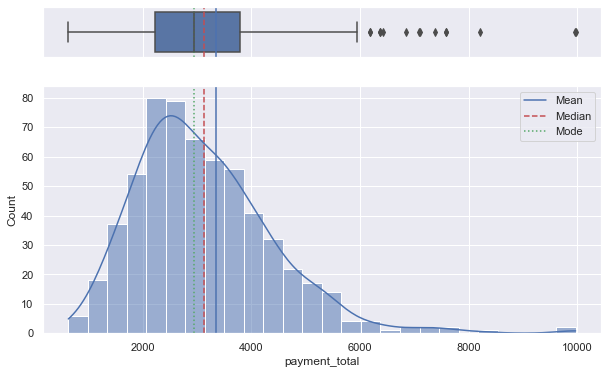

In [25]:
plot_distribution(table1['payment_total'])

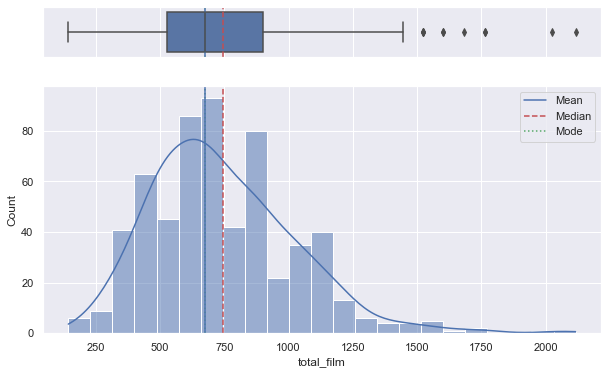

In [26]:
plot_distribution(table1['total_film'])

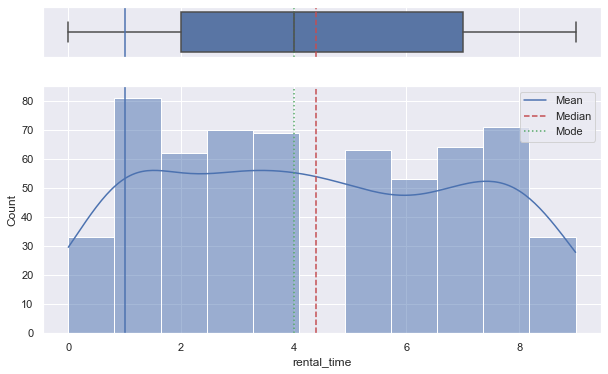

In [27]:
plot_distribution(table1['rental_time'])

Berdasarkan grafik yang telah dibuat diatas, dapat disimpulkan bahwa feature ``payment_total``,  ``total_film``, dan  ``rental_time`` memiliki distribusi data yang tidak normal. Dan pada feature ``payment_total`` dan ``total_film`` juga masih ada beberapa outlier. Kita perlu melakukan penanganan terhadap outlier-outlier tersebut supaya datanya bisa dianalisis lebih lanjut.

## **Mencari Data Outlier Dan Penanganannya**

In [28]:
def find_outlier(column):
  Q1 = column.quantile(0.25)
  Q3 = column.quantile(0.75)
  IQR = Q3 - Q1
  outliers = []

  for data in column:
    if (data > (Q3 + 1.5 * IQR)) | (data < (Q1 - 1.5 * IQR)):
      outliers.append(data)

  return outliers

In [29]:
outliers_payment_total = find_outlier(table1['payment_total'])
outliers_total_film = find_outlier(table1['total_film'])

print('Outliers_payment_total =', outliers_payment_total)
print('Outliers_total_film =', outliers_total_film)

Outliers_payment_total = [6379.19, 7589.79, 8214.36, 9960.84, 6424.31, 7589.79, 6184.0, 7374.36, 6179.56, 6369.56, 7091.56, 6848.79, 7104.0, 9969.75]
Outliers_total_film = [1681, 1521, 1764, 2116, 1521, 1600, 1764, 1521, 1600, 2025]


In [30]:
table1_cleaned = table1[~table1['total_film'].isin(outliers_total_film)]
print('Before removing outliers total film:', table1.shape)
print('After removing outliers total film:', table1_cleaned.shape)

Before removing outliers total film: (599, 15)
After removing outliers total film: (589, 15)


In [31]:
table2_cleaned = table1_cleaned[~table1_cleaned['payment_total'].isin(outliers_payment_total)]
print('Before removing outliers payment total:', table1_cleaned.shape)
print('After removing outliers payment total:', table2_cleaned.shape)

Before removing outliers payment total: (589, 15)
After removing outliers payment total: (585, 15)


Dari hasil diatas terlihat bahwa feature ``payment_total`` memiliki 14 data outlier. Sedangkan untuk feature ``total_film`` memiliki 10 data outlier. Lalu, setelah kita melakukan pengahapusan data outlier tersebut, data kita yang semula terdiri dari 599 baris dengan 15 kolom berubah menjadi terdiri dari 585 baris dengan 15 kolom.

## **Recheck Distribusi Data**

In [32]:
table_cleaned = table2_cleaned

pd.concat([dispersion(table_cleaned['payment_total']),
           dispersion(table_cleaned['total_film']),
           dispersion(table_cleaned['rental_time']) ], ignore_index=True)

,Column,Variance,Standard Deviation,Skew
0,payment_total,1.186333e+06,1089.189297,0.398954
1,total_film,6.181597e+04,248.628182,0.331313
2,rental_time,7.229844e+00,2.688837,0.062608


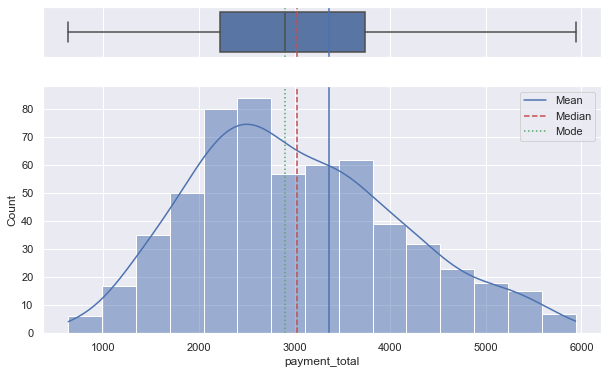

In [33]:
plot_distribution(table_cleaned['payment_total'])

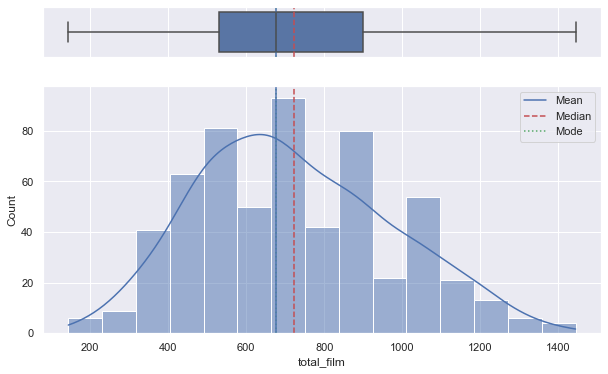

In [34]:
plot_distribution(table_cleaned['total_film'])

Dari grafik diatas terlihat bahwa data outlier sudah tidak ada lagi. Selanjutnya kita akan menganalisis data yang telah bersih sesuai dengan keperluan kita dan melakukan visualisasi data.

## **Uji Normalitas Data**

In [35]:
from scipy.stats import normaltest

kolom = ['payment_total', 'total_film', 'rental_time']
p_value = []
distribusi=[]
for i in kolom:
    stats, pval=normaltest(table_cleaned[i])
    p_value.append(pval)
    if pval>0.05:
        distribusi.append('normal')
    else:
        distribusi.append('tidak normal')
        
pd.DataFrame({'p_value':p_value, 'distribusi':distribusi},index=kolom)

,p_value,distribusi
payment_total,4.975210e-05,tidak normal
total_film,1.409539e-04,tidak normal
rental_time,1.006795e-87,tidak normal


Sebelumnya kita telah melakukan pengukuran distribusi data secara grafik. Selanjutnya kita melakukan pengukuran distribusi data dengan menggunakan uji statisik.
Dari uji normalitas data diatas dapat disimpulkan bahwa feature ``payment_total``, ``total_film``, dan ``rental_film`` memiliki distribusi data yang tidak normal dikarenakan nilai p-value dari ketiga features tersebut lebih kecil dari 0.05.
Hal ini bisa dikatakan ketiga features tersebut termasuk dalam kategori non-parametrik. 

## **Uji Hipotesis**

In [37]:
Ho = 'Tidak Ada Perbedaan Jumlah Pembayaraan Dari Masing-Masing Durasi Peminjaman'
Ha = 'Ada Perbedaan Jumlah Pembayaraan Dari Masing-Masing Durasi Peminjaman'

from scipy.stats import kruskal

result = list(kruskal(
    table_cleaned[table_cleaned['rental_time'] == 0]['payment_total'],
    table_cleaned[table_cleaned['rental_time'] == 1]['payment_total'],
    table_cleaned[table_cleaned['rental_time'] == 2]['payment_total'],
    table_cleaned[table_cleaned['rental_time'] == 3]['payment_total'],
    table_cleaned[table_cleaned['rental_time'] == 4]['payment_total'],
    table_cleaned[table_cleaned['rental_time'] == 5]['payment_total'],
    table_cleaned[table_cleaned['rental_time'] == 6]['payment_total'],
    table_cleaned[table_cleaned['rental_time'] == 7]['payment_total'],
    table_cleaned[table_cleaned['rental_time'] == 8]['payment_total'],
    table_cleaned[table_cleaned['rental_time'] == 9]['payment_total'],
))

print('U-statistic:', result[0])
print('P-Value:', result[1])
print('Kesimpulan :')

if result[1] <= 0.05:
    print('Tolak Ho, artinya', Ha)
else:
    print('Terima Ho, artinya', Ho)

U-statistic: 5.55025906171835
P-Value: 0.7839487229612377
Kesimpulan :
Terima Ho, artinya Tidak Ada Perbedaan Jumlah Pembayaraan Dari Masing-Masing Durasi Peminjaman


In [38]:
#Pengecekan

cek = table_cleaned[['rental_time','payment_total']].groupby('rental_time').median()
cek.sort_values('payment_total', ascending = False, inplace = True)
cek

,payment_total
rental_time,
9,3100.160
6,3012.975
8,2970.240
4,2959.975
3,2943.750
7,2865.200
2,2743.750
5,2723.240
0,2625.995


Dari pengujian normalitas data sebelumnya telah dihasilkan bahwa data-data tersebut tidak terdistribusi normal dan merupakan data non-parametrik. Sehingga pada uji hipotesis ini digunakanlah uji hipotesis ``Kruskal-Wallis``, karena digunakan untuk menguji hipotesis rata-rata di lebih dari dua populasi. Pada uji hipotesis ini kita akan menguji sebagi Ho nya apakah jumlah pembayaran dari masing-masing durasi peminjaman memiliki nilai yang sama.
Berdasarkan hail uji yang telah dilakukan, kesimpulan yang didapat adalah ``Terima Ho``, yang berarti tidak ada perbedaan jumlah pembayaraan dari masing-masing durasi peminjaman atau setiap durasi peminjaman memiliki jumlah pembayaran yang sama. Lalu kita mencoba untuk mengecek dari kedua feature tersebut, dan dari pengecekan dapat dilihat masing-masing jumlah pembayaran di setiap durasi peminjaman memiliki perbedaan namun sangat lah kecil. Sehingga dikatakan bahwa tidak ada perbedaan dari jumlah pembayaran di masing-masing durasi peminjaman. 

## **Hubungan Antara Jumlah Pembayaran, Film Yang Disewa, Dan Waktu Penyewaan**

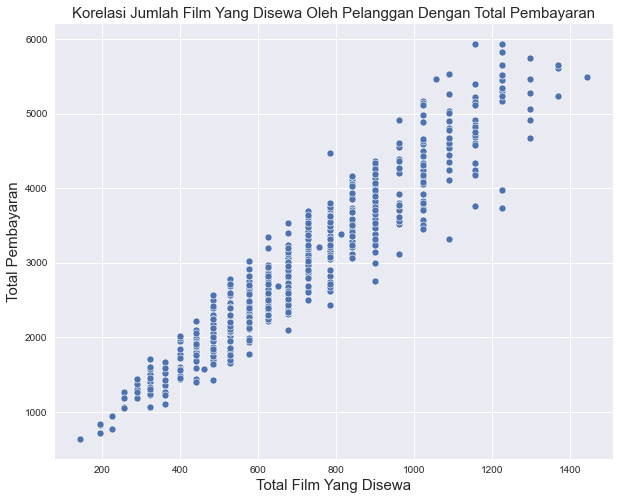

In [44]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=table_cleaned, x='total_film', y='payment_total')
plt.title('Korelasi Jumlah Film Yang Disewa Oleh Pelanggan Dengan Total Pembayaran', size=15)
plt.xlabel('Total Film Yang Disewa', size = 15)
plt.ylabel('Total Pembayaran', size = 15)
plt.show()

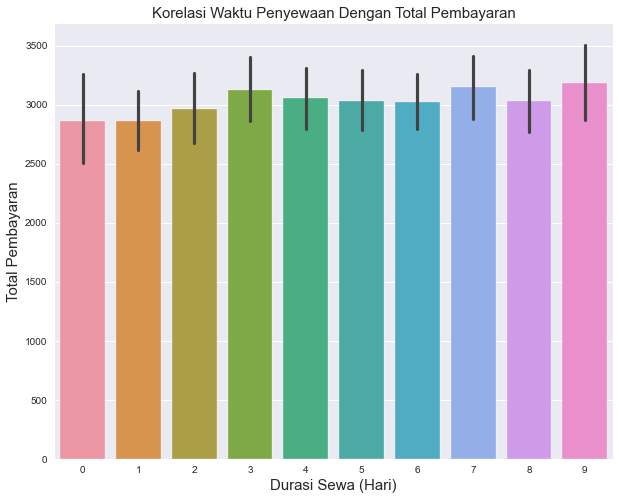

In [59]:
plt.figure(figsize=(10,8))
sns.barplot(data=table_cleaned, x='rental_time', y='payment_total')
plt.title('Korelasi Waktu Penyewaan Dengan Total Pembayaran', size=15)
plt.xlabel('Durasi Sewa (Hari)', size = 15)
plt.ylabel('Total Pembayaran', size = 15)
plt.show()

In [61]:
correlation = table_cleaned[['payment_total', 'total_film', 'rental_time']].corr(method = 'spearman')
correlation

,payment_total,total_film,rental_time
payment_total,1.000000,0.954105,0.079411
total_film,0.954105,1.000000,0.055276
rental_time,0.079411,0.055276,1.000000


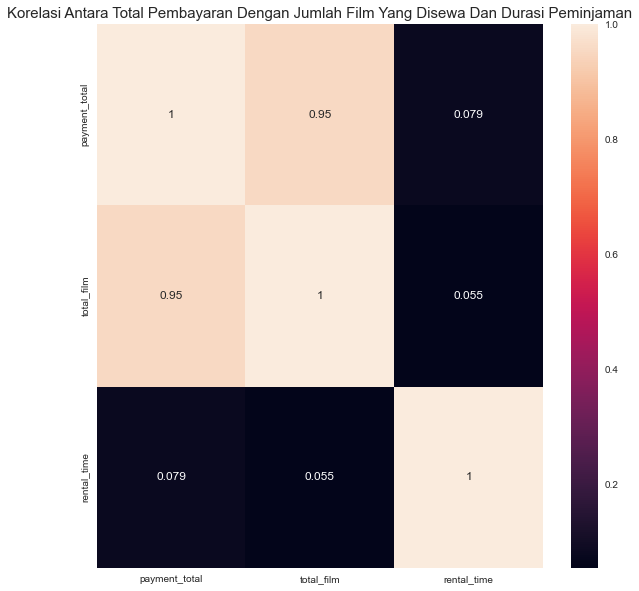

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True)
plt.title('Korelasi Antara Total Pembayaran Dengan Jumlah Film Yang Disewa Dan Durasi Peminjaman', size=15)
plt.show()

Berdasarkan ketiga grafik diatas antara lain scatterplot yang memvisualisasikan antara feature ``payment_total`` dengan ``total_film``, barplot yang memvisualisasikan antara feature ``payment_total`` dengan ``rental_film`` dan heatmap yang memvisualisasikan hubungan antara ketiga features tersebut, dapat disimpulkan bahwa jumlah film yang disewa oleh tiap pelanggan memiliki pengaruh positif yang sangat besar terhadap jumlah hasil pembayaran sewa oleh para pelanggan. Namun, untuk durasi sewa memiliki nilai korelsi yang sangat kecil terhadap jumlah hasil pembayaran yang berarti lamanya pelanggan dalam melakukan sewa tidak berpengaruh besar terhadap nilai jumlah pembayaran yang diberikan oleh masing-masing pelanggan.  

## **Top 5 Pelanggan Dengan Pembayaran Terbanyak**

Berikut ini merupakan Data Top 5 Customer/Pelanggan yang melakukan transaksi pembayaran terbanyak. Oleh karena itu, pihak penyewa perlu lebih memperhatikan pelanggan-pelanggan yang melakukan transaksi pembayaran yang banyak tersebut agar pelanggan tersebut senantiasa melakukan transaksi di toko si penyewa. Salah satu caranya adalah dengan memberikan diskon atau potongan harga kepada para pelanggan tersebut.

In [161]:
top = table_cleaned[['name','payment_total']].groupby('name').sum()
top.sort_values('payment_total', ascending = False, inplace=True)
top.head(5)

,payment_total
name,
ANA BRADLEY,5938.44
DIANE COLLINS,5937.75
MIKE WAY,5832.75
MARGIE WADE,5747.04
LOUIS LEONE,5657.75


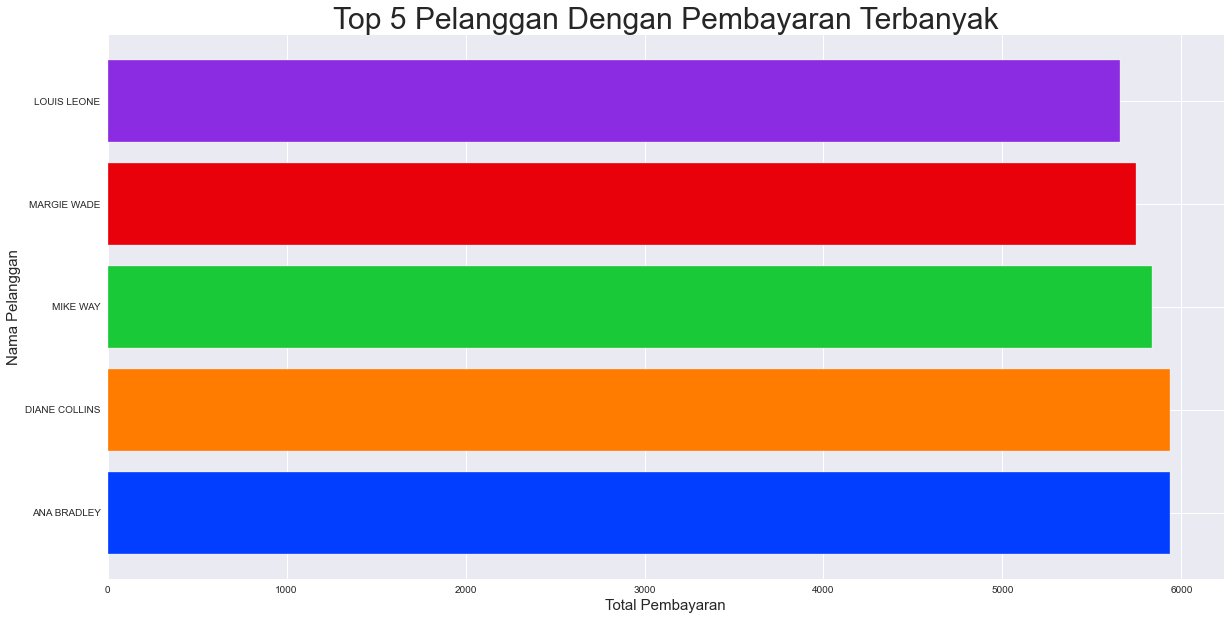

In [42]:
top_customer = table_cleaned[['name','payment_total']].groupby('name').sum().sort_values('payment_total', ascending = False)
top_customer = top_customer.head(5)

x = top_customer.index
y = top_customer['payment_total']

plt.style.use('seaborn')
plt.figure(figsize = (20,10))
plt.barh(x,y, color = sns.color_palette('bright'))
plt.title('Top 5 Pelanggan Dengan Pembayaran Terbanyak', size = 30)
plt.xlabel('Total Pembayaran', size = 15)
plt.ylabel('Nama Pelanggan', size = 15)
plt.show()

## **Top 5 Pelanggan Dengan Peminjaman Film Terbanyak**

Berikut ini merupakan Data Top 5 Customer/Pelanggan yang melakukan penyewaan film terbanyak. Oleh karena itu, pihak penyewa perlu lebih memperhatikan pelanggan-pelanggan yang melakukan banyak pinjaman film tersebut agar pelanggan tersebut tetap selalu melakukan peminjaman film di toko si penyewa. Salah satu caranya adalah dengan memberikan promo atau giveaway kepada para pelanggan tersebut.  

In [163]:
top_rentfilm = table_cleaned[['name','total_film']].groupby('name').sum()
top_rentfilm.sort_values('total_film', ascending = False, inplace=True)
top_rentfilm.head(5)

,total_film
name,
ELIZABETH BROWN,1444
MARSHA DOUGLAS,1369
ELSIE KELLEY,1369
BRANDON HUEY,1369
ALEXANDER FENNELL,1296


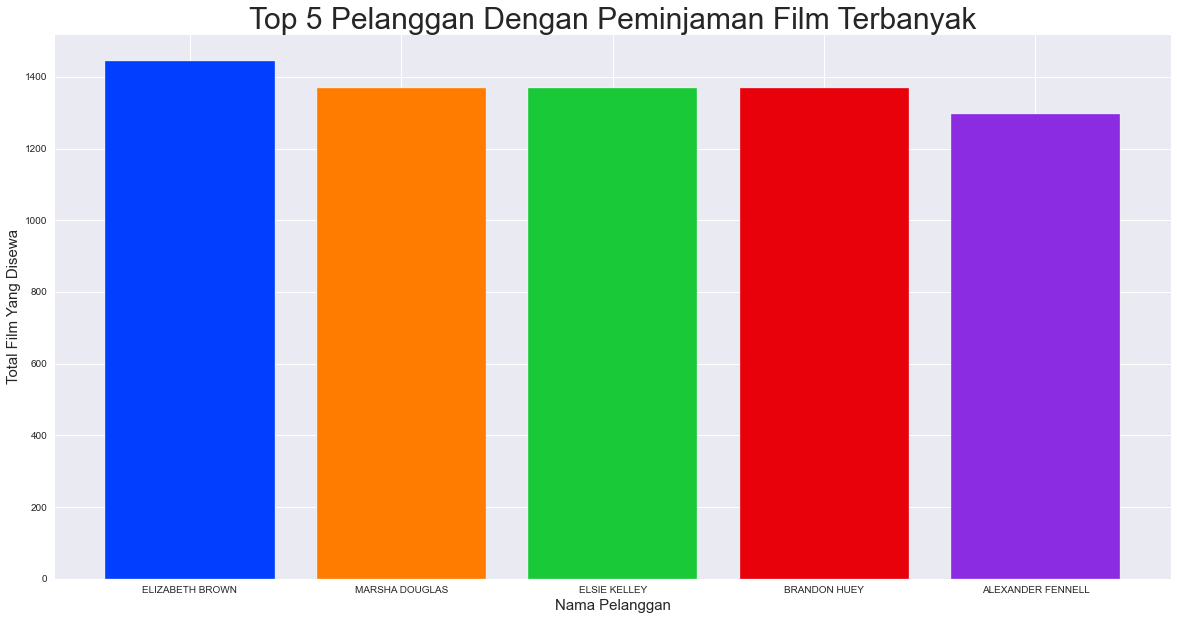

In [41]:
top_rentfilm = table_cleaned[['name','total_film']].groupby('name').sum().sort_values('total_film', ascending = False)
top_rentfilm = top_rentfilm.head(5)

x = top_rentfilm.index
y = top_rentfilm['total_film']

plt.style.use('seaborn')
plt.figure(figsize = (20,10))
plt.bar(x,y, color = sns.color_palette('bright'))
plt.title('Top 5 Pelanggan Dengan Peminjaman Film Terbanyak', size = 30)
plt.xlabel('Nama Pelanggan', size = 15)
plt.ylabel('Total Film Yang Disewa', size = 15)
plt.show()